# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

Case : the wine company hire me to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference. my task is to  use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features

Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

In [3]:
df = pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
print(f'This dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contains of 6497 rows and 13 columns


In [4]:
# check missing values
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

In [5]:
# check duplicate
df.duplicated().sum()

1177

In [4]:
# drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Data Exploration

In [5]:
eda = df.copy()

cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(include='number').columns

In [8]:
eda.shape

(5320, 13)

## Descriptive Statistic

In [9]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


## Univariate Analysis

In [6]:
len(num)

11

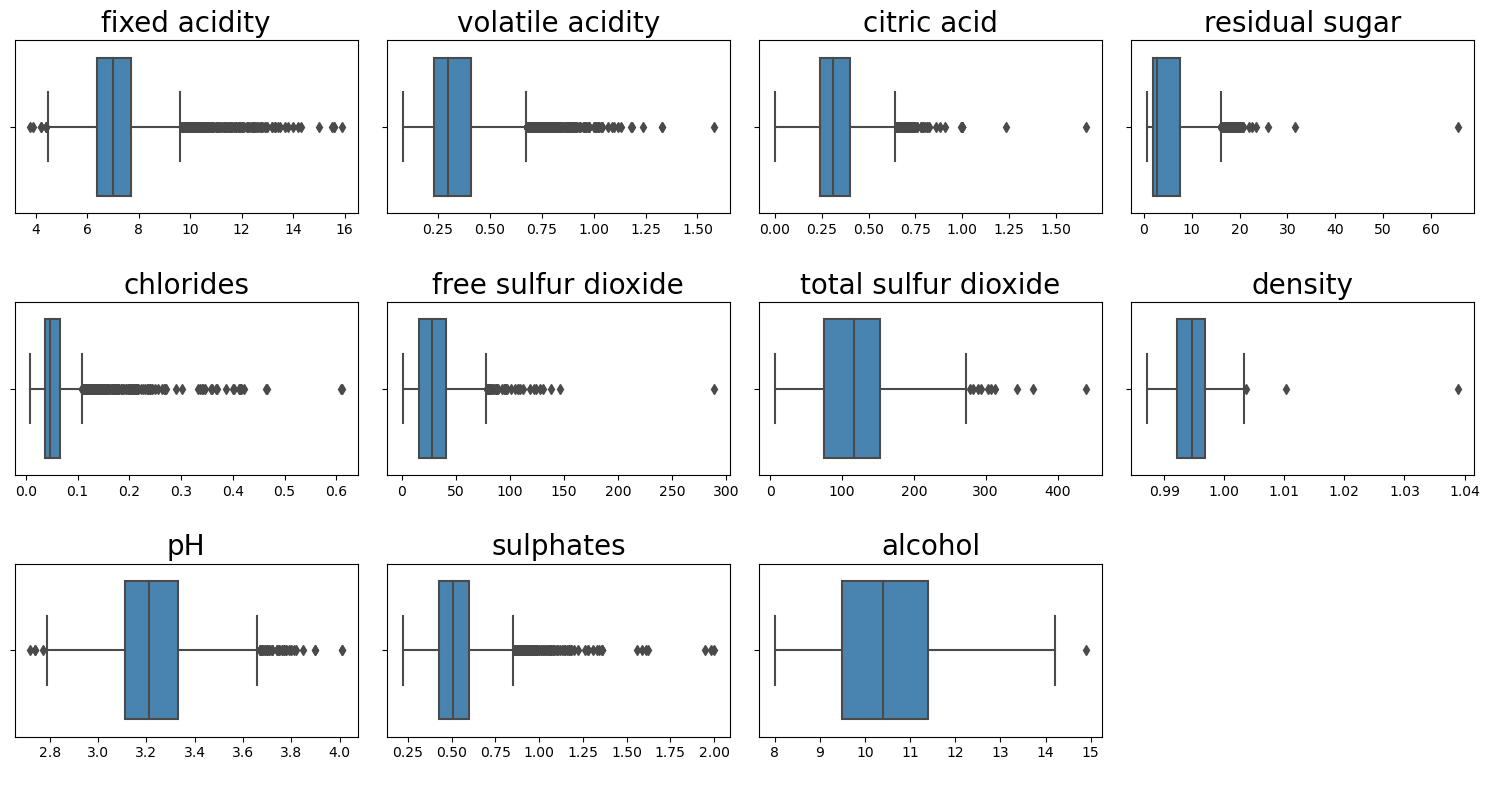

In [8]:
plt.figure(figsize=(15,8))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

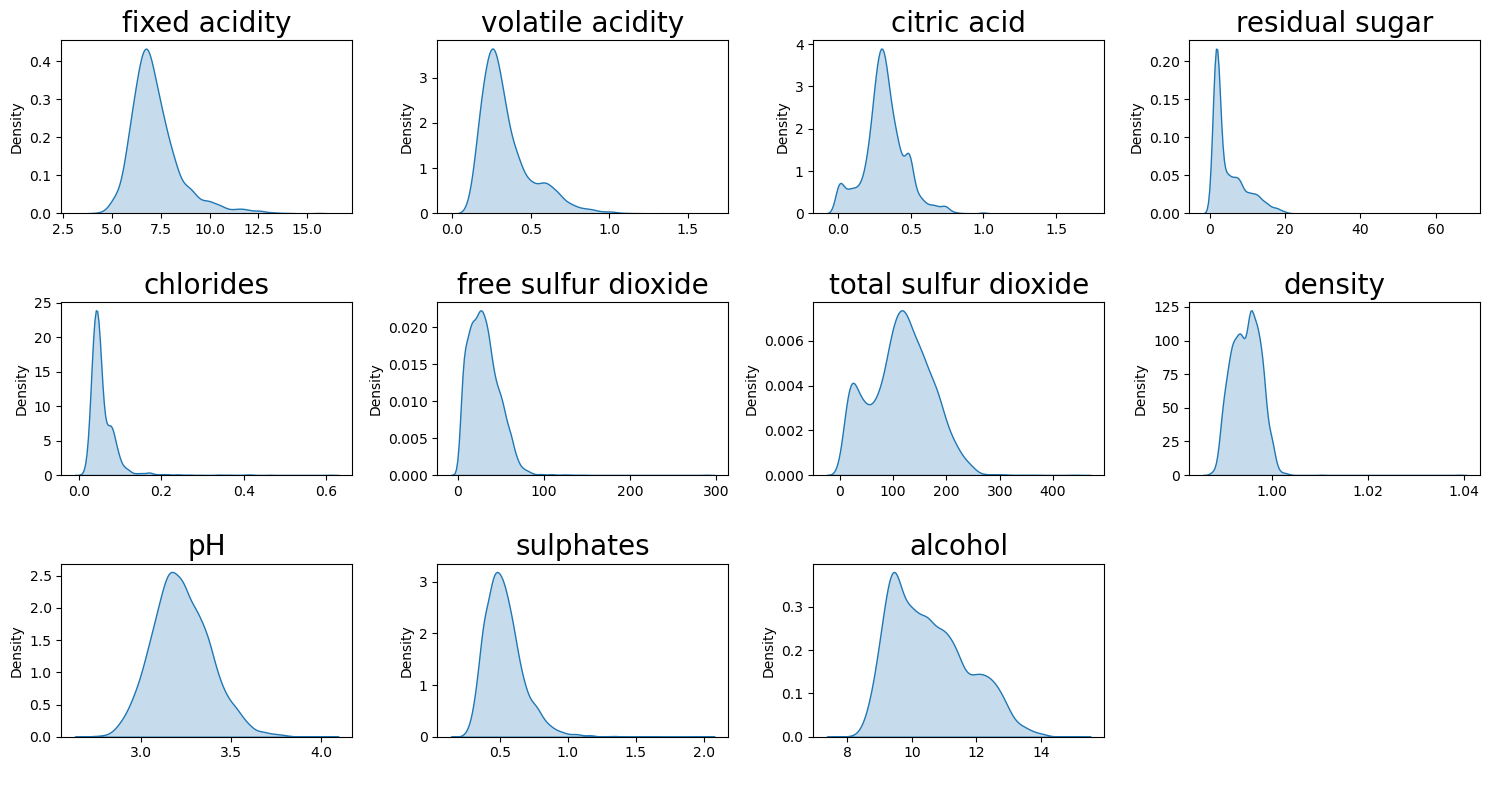

In [10]:
plt.figure(figsize=(15,8))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='Blues_d', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

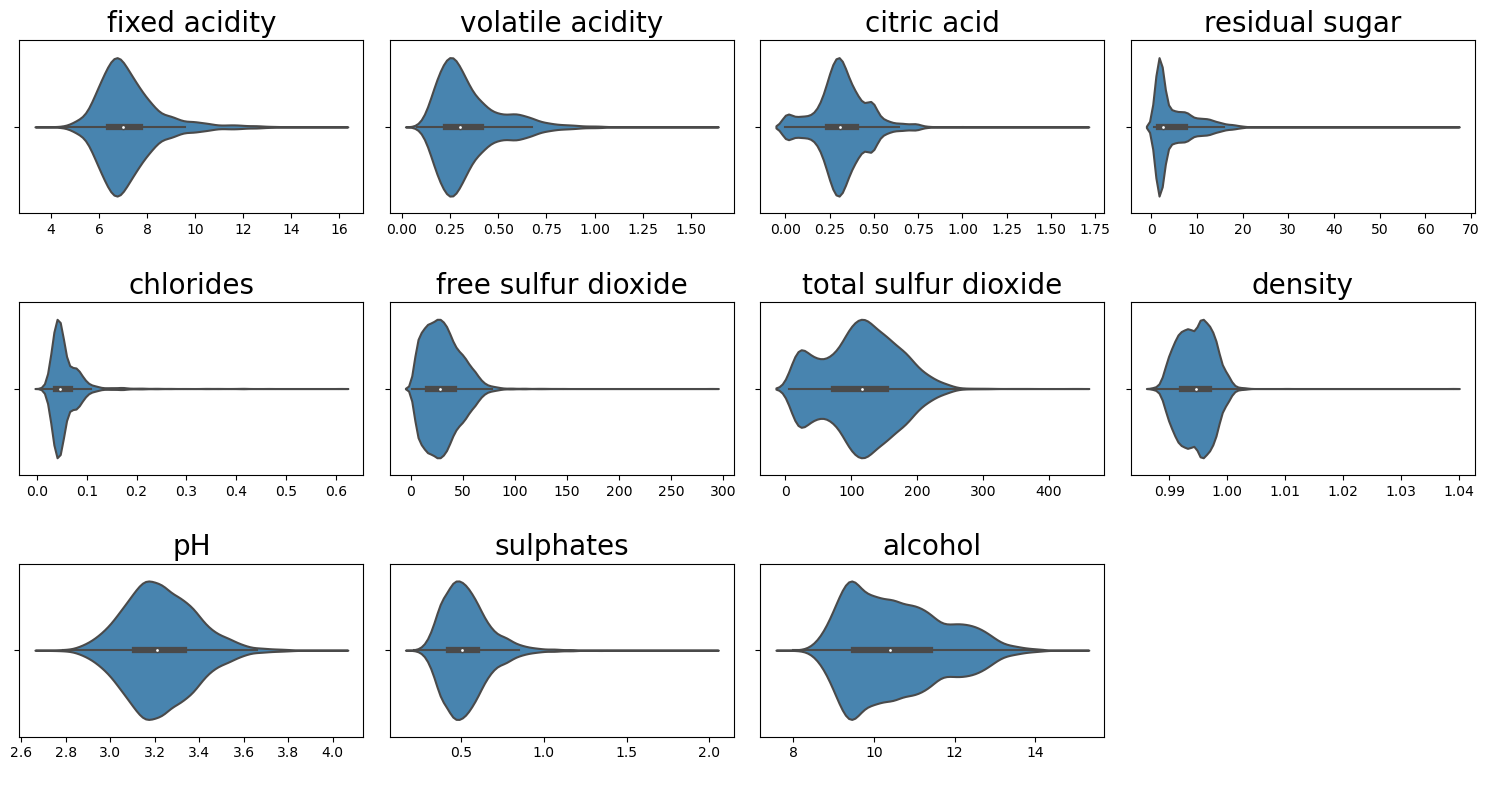

In [11]:
plt.figure(figsize=(15,8))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='Blues_d', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [13]:
cat

Index(['quality', 'type'], dtype='object')

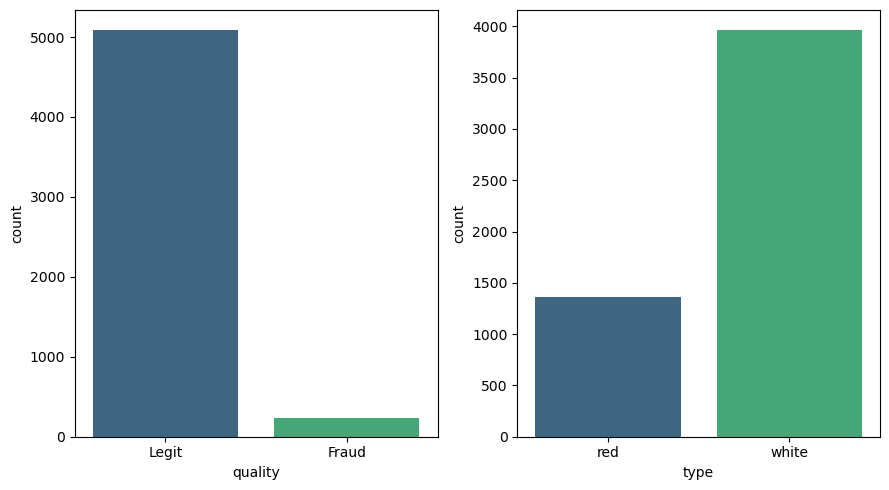

In [63]:
fig, axes = plt.subplots(1,2,figsize=(9,5))

sns.countplot(x=eda['quality'], palette='viridis', ax=axes[0])
sns.countplot(x=eda['type'], palette='viridis', ax=axes[1])
plt.tight_layout()

## Bivariate Analysis

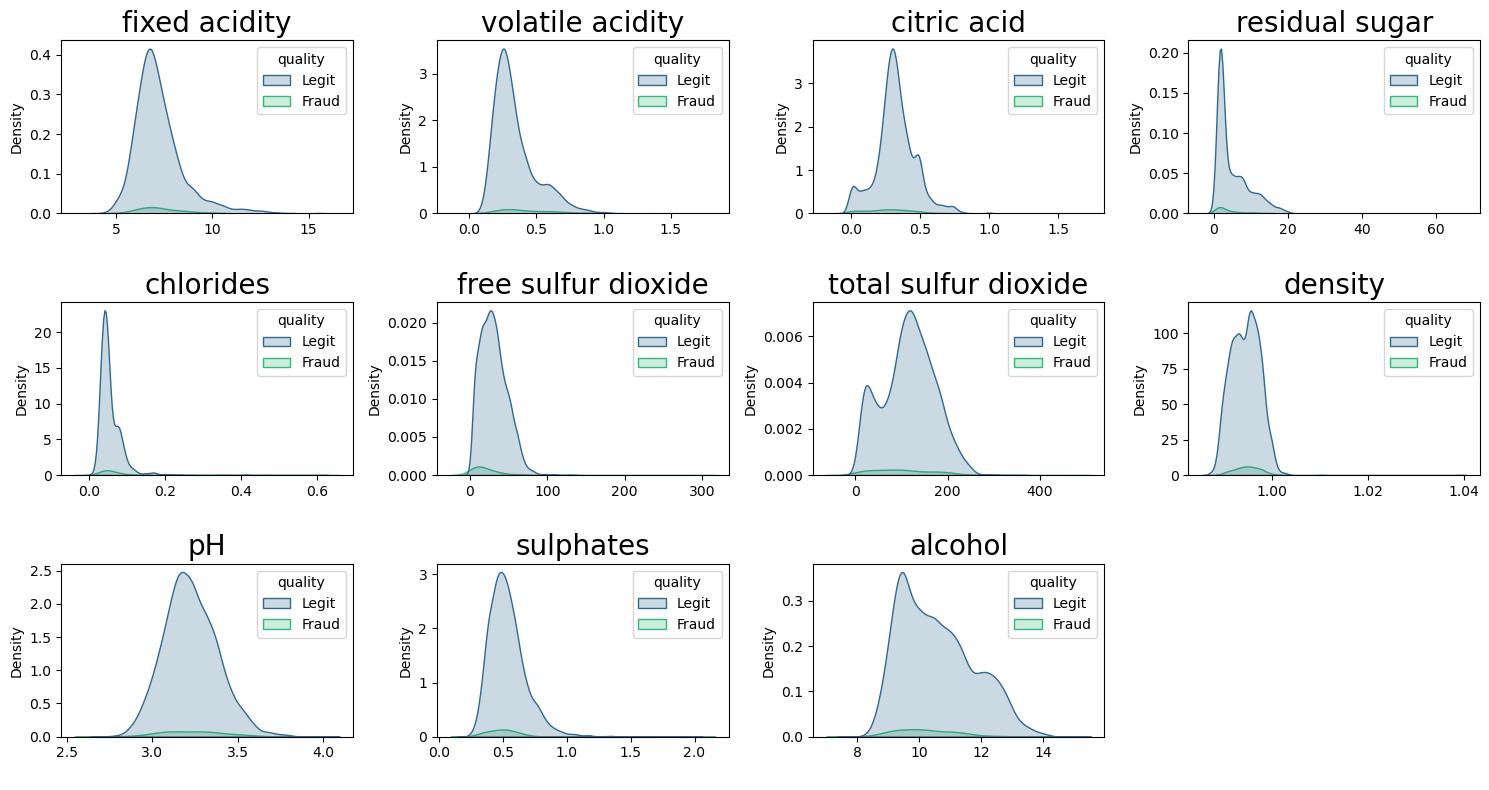

In [18]:
plt.figure(figsize=(15,8))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['quality'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

<AxesSubplot:xlabel='quality', ylabel='count'>

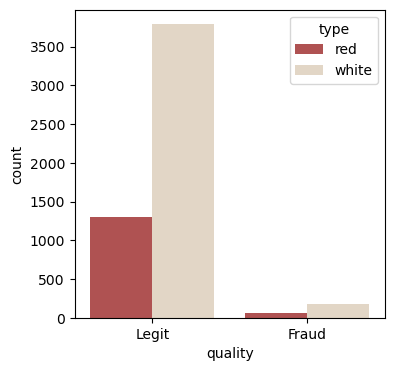

In [36]:
pal = ['#bf4342','#e7d7c1']
plt.figure(figsize=(4,4))
sns.countplot(x=eda['quality'], palette=pal, hue=eda['type'])

## Pair Plot Analysis

In [40]:
eda['quality'].value_counts()

Legit    5084
Fraud     236
Name: quality, dtype: int64

In [43]:
# change target label into numeric
eda['target'] = eda['quality'].map({'Fraud':0,'Legit':1})
eda['target'].value_counts()

1    5084
0     236
Name: target, dtype: int64

<Figure size 800x600 with 0 Axes>

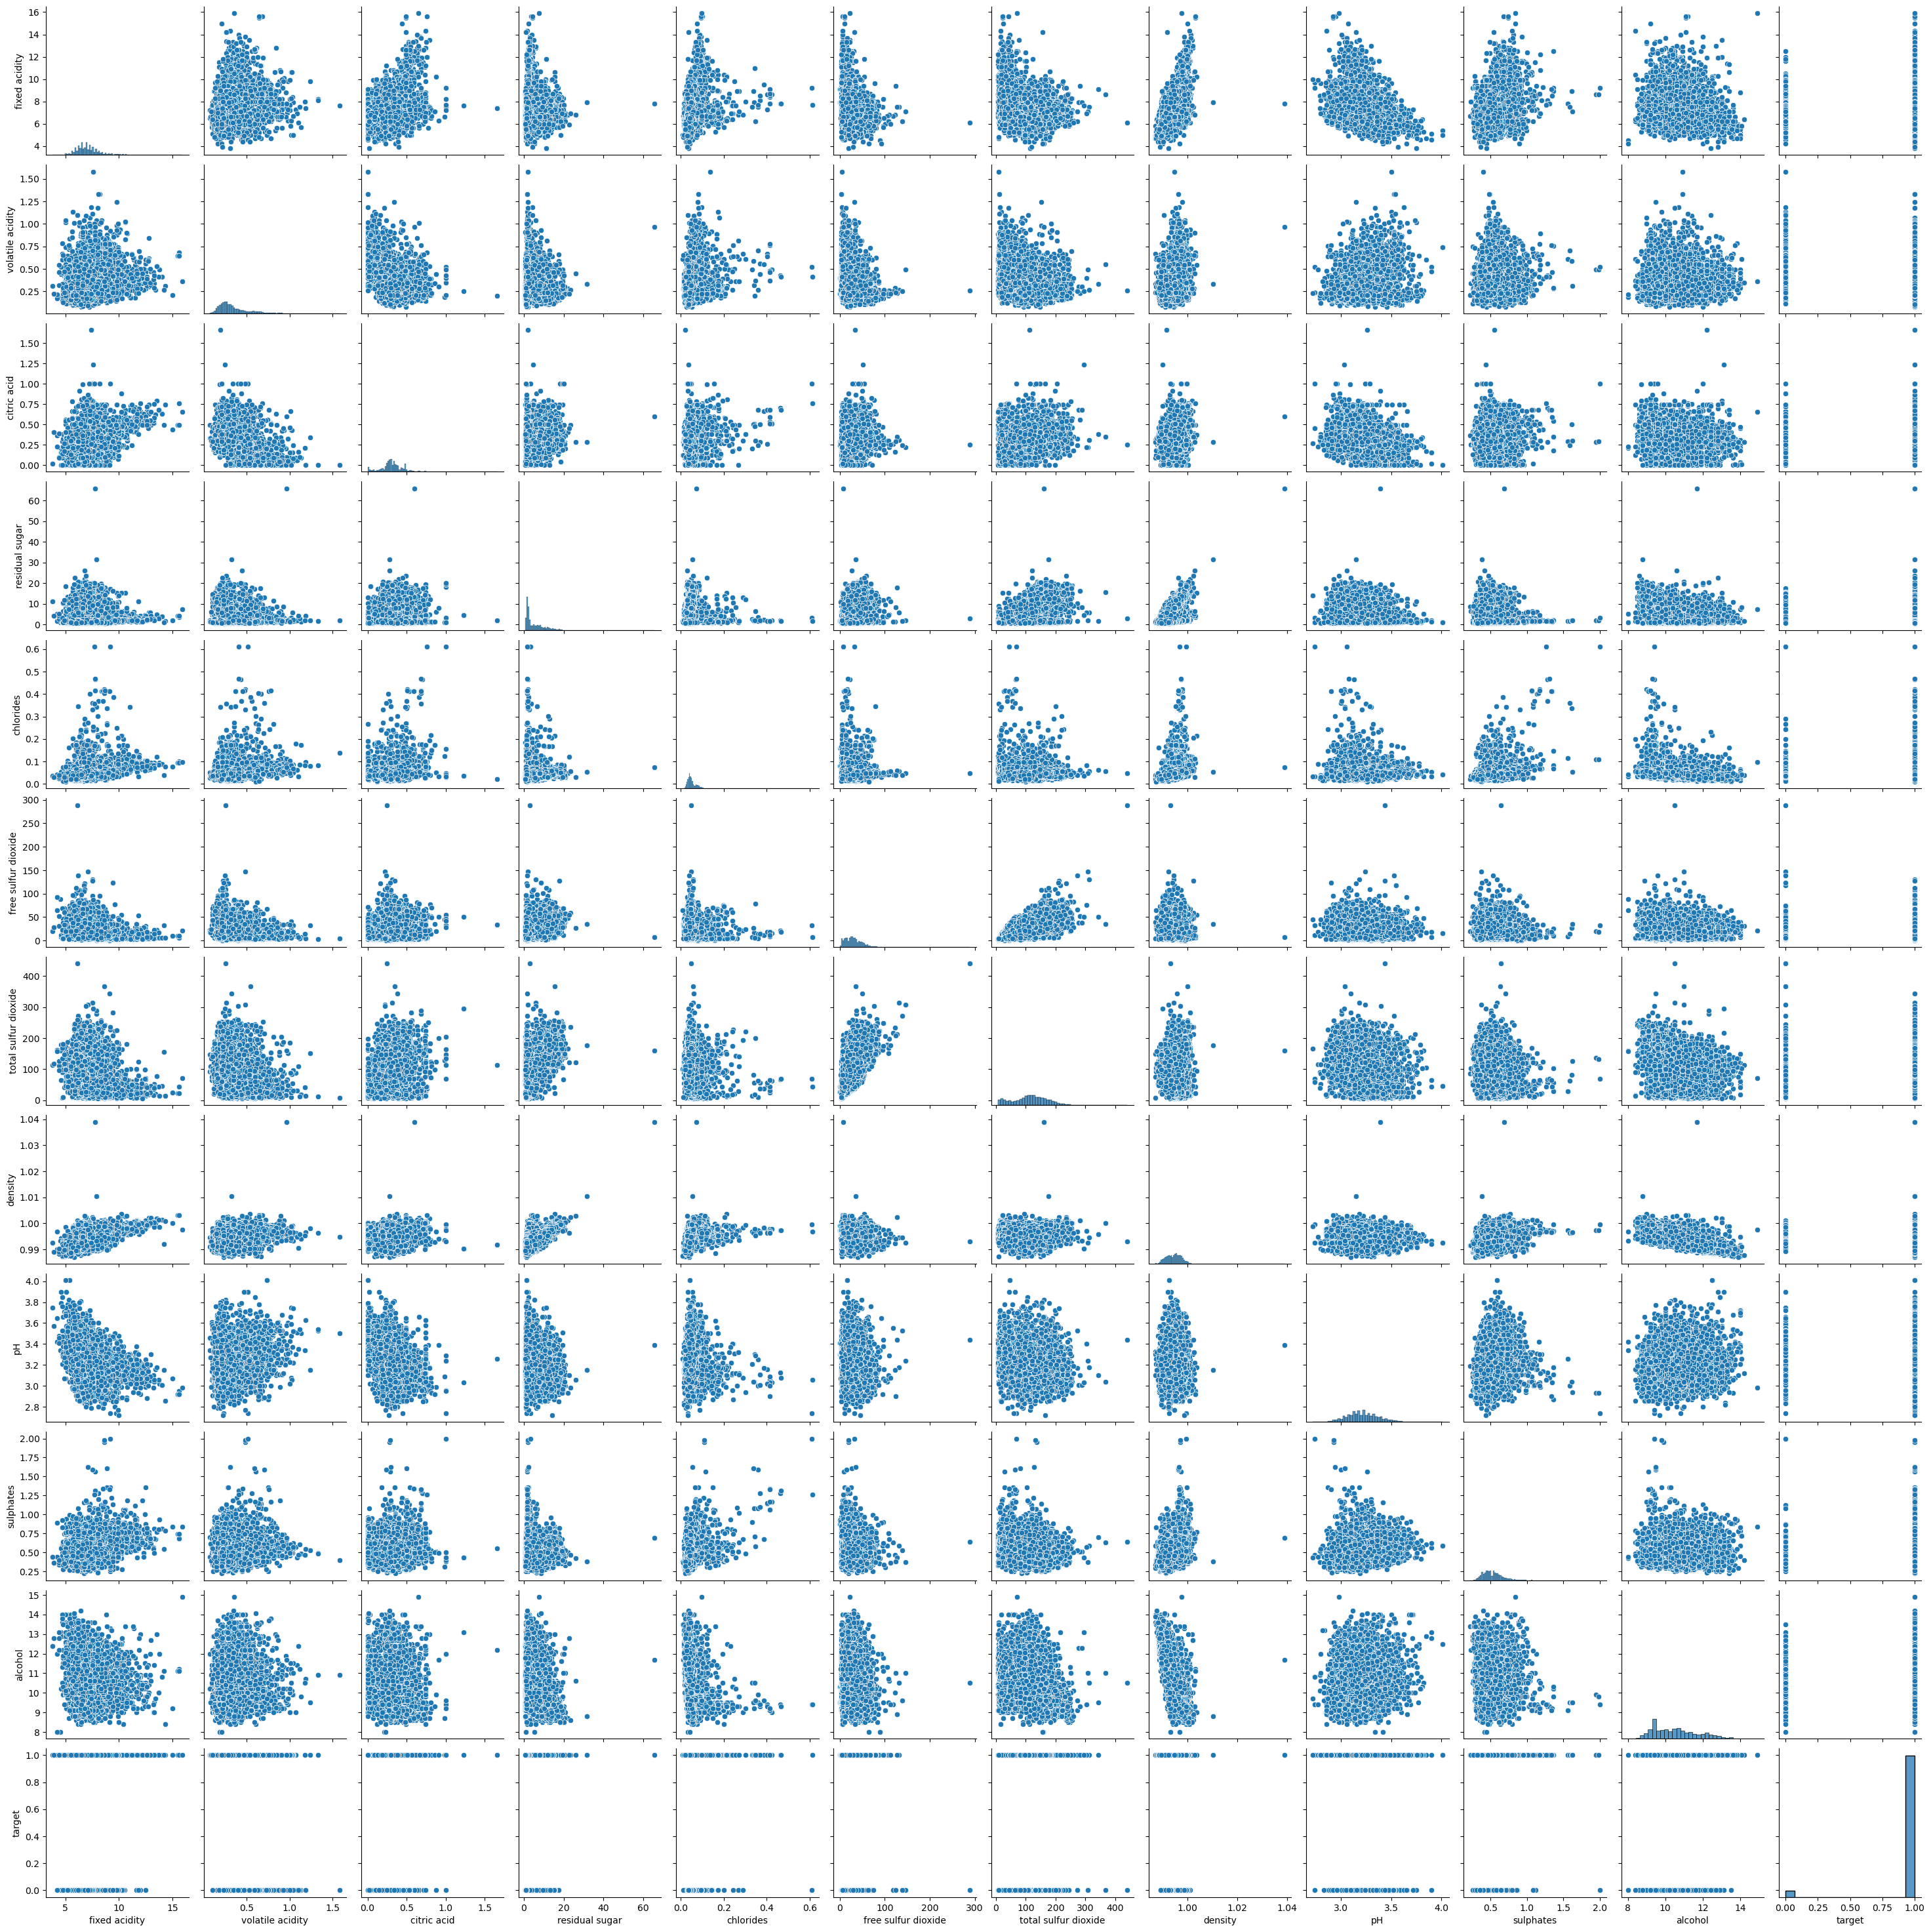

In [45]:
plt.figure(figsize=(8,6))
sns.pairplot(eda)

# Data Pre Processing

## Feature Engineering

In [52]:
df['quality'] = df['quality'].map({'Fraud':0,'Legit':1})
df['quality'].value_counts()

1    5084
0     236
Name: quality, dtype: int64

In [54]:
df['type'] = df['type'].map({'white':0,'red':1})
df['type'].value_counts()

0    3961
1    1359
Name: type, dtype: int64

## Train Test Split

In [55]:
X = df.drop('quality',axis=1)
y = df['quality']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

X_train.shape, X_test.shape

((4788, 12), (532, 12))

## Features Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Modeling

In [59]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

## Grid CV

In [60]:
from sklearn.model_selection import GridSearchCV

# define parameter
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto']}


grid = GridSearchCV(svc,param_grid)

# fit 
grid.fit(scaled_X_train,y_train)

grid.best_params_

{'C': 1, 'gamma': 'scale'}

## Evaluation

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

# predict
grid_pred = grid.predict(scaled_X_test)

# cf metric
confusion_matrix(y_test,grid_pred)

array([[ 11,   8],
       [ 87, 426]])

In [62]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.11      0.58      0.19        19
           1       0.98      0.83      0.90       513

    accuracy                           0.82       532
   macro avg       0.55      0.70      0.54       532
weighted avg       0.95      0.82      0.87       532

